# Q5: Planetary orbit

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, linalg

def rhs(t:float, point:np.ndarray, mass:float):
    # y = [x, y, v_x, v_y]'
    x = point[2]
    y = point[3]
    v_x = -4*np.pi**2*mass * point[0] / np.linalg.norm(point[0:2])**3
    v_y = -4*np.pi**2*mass * point[1] / np.linalg.norm(point[0:2])**3
    return np.array([x, y, v_x, v_y])

def orbit(a:float, e:float, m:float, npoints:int = 100):
    iv = np.array([a*(1-e), 0, 0, np.sqrt(4*np.pi**2 * (1+e) / (a*(1-e)))])

    period = np.sqrt(a**3/m)
    r = integrate.solve_ivp(rhs, [0, period], iv, t_eval = np.linspace(0, period, npoints, endpoint=True), args=tuple([m]), atol=1e-9, rtol=1e-9)
    return r.y[0], r.y[1]

In [124]:
# Earth parameters
a = 1 #AU, major semiaxis
e = 0.0167 # eccentricity
m = 1 # M_sun, mass of the central object
x, y = orbit(a, e, m, npoints=500)

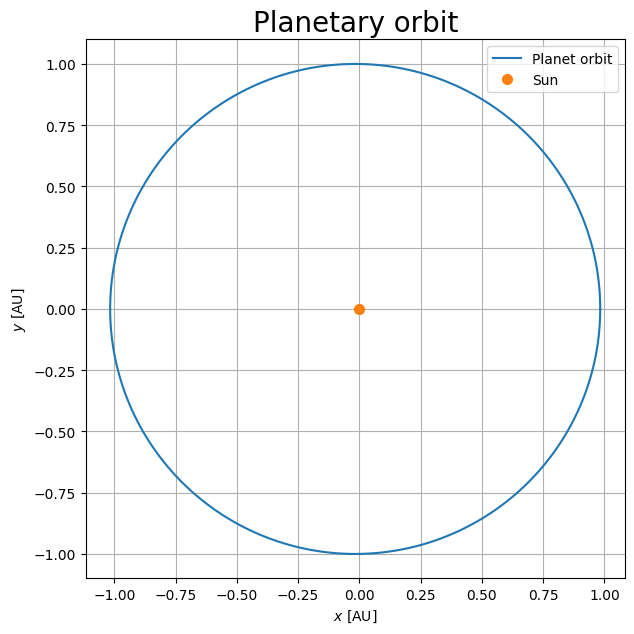

In [125]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.plot(x, y, label = "Planet orbit")
ax.plot(0, 0, "o", markersize=7, label = "Sun")
ax.set_aspect("equal")
ax.xaxis.set_label_text(r"$x\,\,\mathrm{[AU]}$")
ax.yaxis.set_label_text(r"$y\,\,\mathrm{[AU]}$")
ax.set_title("Planetary orbit", fontsize=20)
ax.grid(True)
ax.legend()

# Q6: Condition number

In [274]:
min_dim = 8
max_dim = 13
sample = 10000

err = np.zeros((max_dim - min_dim+1, max_dim))

err_lstsq = np.zeros((max_dim - min_dim+1, max_dim))
for di, d in enumerate(range(min_dim, max_dim+1)):
    H = linalg.hilbert(d)
    x = np.random.rand(d, sample)*50-25
    b = H @ x
    error_sol = np.abs(linalg.solve(H, b) - x)
    err[di, 0:d] = np.mean(error_sol, axis=1)

    error_lstsq = np.abs(linalg.lstsq(H, b)[0] - x)
    err_lstsq[di, 0:d] = np.mean(error_lstsq, axis=1)


/home/diego/.local/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.3561e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/diego/.local/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.10115e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


(4.3937306804325956e-11, 2134.327045795806)

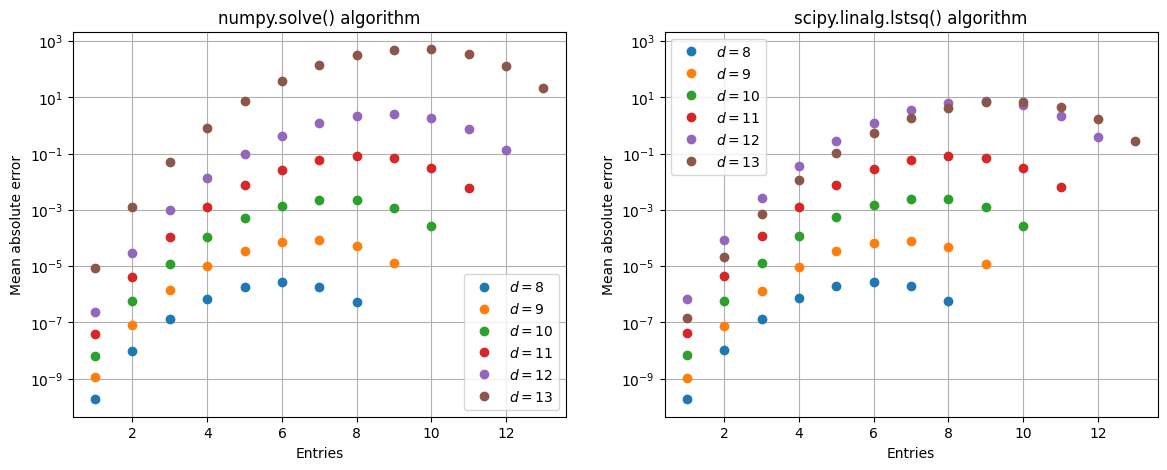

In [275]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1)
for di, d in enumerate(range(min_dim, max_dim+1)):
    ax1.plot(np.arange(1, d+1), err[di, 0:d], "o", label = f"$d = {d}$")
    ax1.semilogy()
    ax1.xaxis.set_label_text("Entries")
    ax1.yaxis.set_label_text("Mean absolute error")
    ax1.set_title("numpy.solve() algorithm")
    ax1.grid(True)
    ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
for di, d in enumerate(range(min_dim, max_dim+1)):
    ax2.plot(np.arange(1, d+1), err_lstsq[di, 0:d], "o", label = f"$d = {d}$")
    ax2.semilogy()
    ax2.xaxis.set_label_text("Entries")
    ax2.yaxis.set_label_text("Mean absolute error")
    ax2.set_title("scipy.linalg.lstsq() algorithm")
    ax2.grid(True)
    ax2.legend()

ax1.set_ylim(np.min(np.array([ax1.get_ylim(), ax2.get_ylim()])), np.max(np.array([ax1.get_ylim(), ax2.get_ylim()])))
ax2.set_ylim(np.min(np.array([ax1.get_ylim(), ax2.get_ylim()])), np.max(np.array([ax1.get_ylim(), ax2.get_ylim()])))